In [1]:
import glob
import matplotlib as mlib
import matplotlib.pyplot as plt
import numpy as np
from numpy import genfromtxt
from numpy import loadtxt
import re
import csv
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import matplotlib.patches as mpatches

In [2]:
#Plotting settings
font = {
        'weight' : 'normal',
        'size'   : 16}

mlib.rc('font', **font)

In [3]:
def histosFromFiles(folder, binwidth, iftoreverse):
    
    #reading files with histos info
    files = sorted(glob.glob( folder+'/*.dat'),reverse=iftoreverse)
    #print(files)
    
    '''
    #reading cross sections and luminocities to calculate weights
    sigmaLumi=[]
    with open (folder+'/cross-section_lumi.txt', 'r') as f:
        for row in csv.reader(f,delimiter='\t'):
            sigmaLumi.append(row)
    sigmaLumi=sigmaLumi[1:]
    print(sigmaLumi)
    '''
    
    normalize = mcolors.Normalize(0, len(files))
    
    global usedcolors
    usedcolors=[]
    for filenum, file in enumerate(files):
        print(file)
        histoarray = np.array(genfromtxt(file))
        nbins=np.int(np.amax(histoarray)/binwidth)
        n, bins, patches = plt.hist(histoarray, bins=nbins, density=True,\
                            alpha=0.7, rwidth=1, color=colormap(normalize(filenum)))
        print(histoarray.size)
        usedcolors.append(colormap(normalize(filenum)))
    #print(usedcolors)

In [4]:
# integrating the area under the histogram and plotting cross section for different parameter ranges

def intergrateHistos(folder, binwidth, iftoreverse, *cuts):
    
    
    #reading files with histos info
    files = sorted(glob.glob( folder+'/*.dat'),reverse=iftoreverse)
    print(files)
    
    #reading cross sections and luminocities to calculate weights
    sigmaLumi=[]
    with open (folder+'/cross-section_lumi.txt', 'r') as f:
        for row in csv.reader(f,delimiter='\t'):
            sigmaLumi.append(row)
    sigmaLumi=sigmaLumi[1:]
    #print(sigmaLumi)
    
    normalize = mcolors.Normalize(0, len(files))
    
    global usedcolors
    usedcolors=[]
    
    for sigmafile in sigmaLumi:
        #print(sigmafile)
        for filenum, file in enumerate(files):
            #print(sigmafile[0])
            if (sigmafile[0] in file):
                print(sigmafile[0])
                print(file)
                #print(float(sigmafile[1]))
                histoarray = np.array(genfromtxt(file))
                nbins=np.int(np.amax(histoarray)/binwidth)
                n, bins, patches = plt.hist(histoarray, bins=nbins, density=True,\
                                    alpha=0, rwidth=1, color=colormap(normalize(filenum)))

                usedcolors.append(colormap(normalize(filenum)))
                integral=[]
                for cut in cuts:
                    integral.append(float(sigmafile[1])*binwidth * sum(n[cut:100]))
                plt.plot(cuts,integral,color=colormap(normalize(filenum)))
                plt.xlim(cuts[0],cuts[-1])


In [5]:
def histos2DFromFiles(filex, filey, binwidth):
    
    
    #normalize = mcolors.Normalize(0, len(files))

    global usedcolors
    usedcolors=[]

    histoarrayx = np.array(genfromtxt(filex))
    histoarrayy = np.array(genfromtxt(filey))
    
    nbins=np.int(np.amax(histoarrayx)/binwidth)
    print(nbins)
    
    n = plt.hist2d(histoarrayx, histoarrayy, bins=nbins, density=True, alpha=0.7, cmap=colormap)
    #print(n)
    #print(usedcolors)


In [ ]:
#pT for benchmarks

plt.figure(figsize=(8, 6))

histosFromFiles('histos_jet40/pT',2, True)


plt.xlim(0,100)
plt.ylim(10**(-4),8*10**(-1))
plt.yscale("log")

plt.title("benchmark points")
plt.xlabel('$p_T(l^+)$')
plt.ylabel('$d\\sigma/d p_T(l^+)/\\sigma$')


patch1 = mpatches.Patch(color=usedcolors[0], label='$m_l=500$')
patch2 = mpatches.Patch(color=usedcolors[1], label='$m_l=300$')
patch3 = mpatches.Patch(color=usedcolors[2], label='$m_l=100$')
plt.legend(handles=[patch1, patch2, patch3],loc='upper right')

#plt.savefig('histos_jet40/figs/ptl_bencmark.png')

In [ ]:
plt.figure(figsize=(8, 6))

intergrateHistos('histos_jet40/pT_mCfixed_mlvaries',2,False,0,20,30,40,50)


plt.ylim(10**(-4),1.5*10**(-2))
plt.yscale("log")

plt.title("$m_C=324$")
plt.xlabel('$p_T^{cut}(l^+)$')
plt.ylabel('$\\sigma$ [pb]')


patch1 = mpatches.Patch(color=usedcolors[0], label='$\\Delta m_{cl}=50$')
patch2 = mpatches.Patch(color=usedcolors[1], label='$\\Delta m_{cl}=40$')
patch3 = mpatches.Patch(color=usedcolors[2], label='$\\Delta m_{cl}=30$')
patch4 = mpatches.Patch(color=usedcolors[3], label='$\\Delta m_{cl}=20$')
patch5 = mpatches.Patch(color=usedcolors[4], label='$\\Delta m_{cl}=10$')

plt.legend(handles=[patch1,patch2,patch3,patch4,patch5],loc='upper right')

plt.savefig('histos_jet40/figs/cross-section_drop_with_pTcut_mTfixed.png')

In [7]:
# mC fixed, ml varies

#color scheme
colormap = cm.jet

In [ ]:
plt.figure(figsize=(8, 6))

intergrateHistos('histos_jet40/pT_mC120_mlvaries',2,False,0,20,30,40,50,60,70,80,90)


plt.ylim(4*10**(-3),0.8)
plt.xlim(0,50)
plt.yscale("log")

plt.title("$m_C=120$")
plt.xlabel('$p_T^{cut}(l^+)$')
plt.ylabel('$\\sigma$ [pb]')


patch1 = mpatches.Patch(color=usedcolors[0], label='$\\Delta m_{cl}=50$')
patch2 = mpatches.Patch(color=usedcolors[1], label='$\\Delta m_{cl}=40$')
patch3 = mpatches.Patch(color=usedcolors[2], label='$\\Delta m_{cl}=30$')
patch4 = mpatches.Patch(color=usedcolors[3], label='$\\Delta m_{cl}=20$')
patch5 = mpatches.Patch(color=usedcolors[4], label='$\\Delta m_{cl}=10$')

plt.legend(handles=[patch1,patch2,patch3,patch4,patch5],loc='upper right')

plt.savefig('histos_jet40/figs/cross-section_drop_with_pTcut_mT120.png')

histos_jet/pT_mCfixed_mlvaries/pTlplus_rr5.00e-08_mS2.75e+02_mT3.24e+02.dat
123067
histos_jet/pT_mCfixed_mlvaries/pTlplus_rr5.00e-08_mS2.85e+02_mT3.24e+02.dat
123074
histos_jet/pT_mCfixed_mlvaries/pTlplus_rr5.00e-08_mS2.95e+02_mT3.24e+02.dat
123272
histos_jet/pT_mCfixed_mlvaries/pTlplus_rr5.00e-08_mS3.05e+02_mT3.24e+02.dat
123115
histos_jet/pT_mCfixed_mlvaries/pTlplus_rr5.00e-08_mS3.14e+02_mT3.24e+02.dat
123312


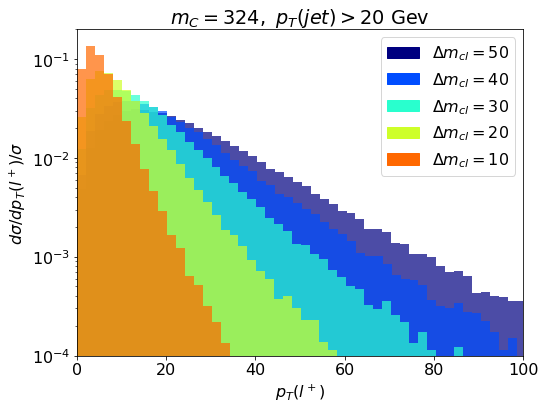

In [8]:
#pTl: mC fixed, ml varies

plt.figure(figsize=(8, 6))

histosFromFiles('histos_jet40/pT_mCfixed_mlvaries',2,False)


plt.xlim(0,100)
plt.ylim(10**(-4),2*10**(-1))
plt.yscale("log")

plt.title("$m_C=324,\ p_T(jet)>20$ Gev")
plt.xlabel('$p_T(l^+)$')
plt.ylabel('$d\\sigma/d p_T(l^+)/\\sigma$')


patch1 = mpatches.Patch(color=usedcolors[0], label='$\\Delta m_{cl}=50$')
patch2 = mpatches.Patch(color=usedcolors[1], label='$\\Delta m_{cl}=40$')
patch3 = mpatches.Patch(color=usedcolors[2], label='$\\Delta m_{cl}=30$')
patch4 = mpatches.Patch(color=usedcolors[3], label='$\\Delta m_{cl}=20$')
patch5 = mpatches.Patch(color=usedcolors[4], label='$\\Delta m_{cl}=10$')

plt.legend(handles=[patch1,patch2,patch3,patch4,patch5],loc='upper right')

plt.savefig('histos_jet40/figs/ptl_different_splittings.png')

histos_jet/pT-ml_mCfixed_mlvaries/pTpsil_rr5.00e-08_mS2.75e+02_mT3.24e+02.dat
123067
histos_jet/pT-ml_mCfixed_mlvaries/pTpsil_rr5.00e-08_mS2.95e+02_mT3.24e+02.dat
123272
histos_jet/pT-ml_mCfixed_mlvaries/pTpsil_rr5.00e-08_mS3.05e+02_mT3.24e+02.dat
123115
histos_jet/pT-ml_mCfixed_mlvaries/pTpsil_rr5.00e-08_mS3.14e+02_mT3.24e+02.dat
123312


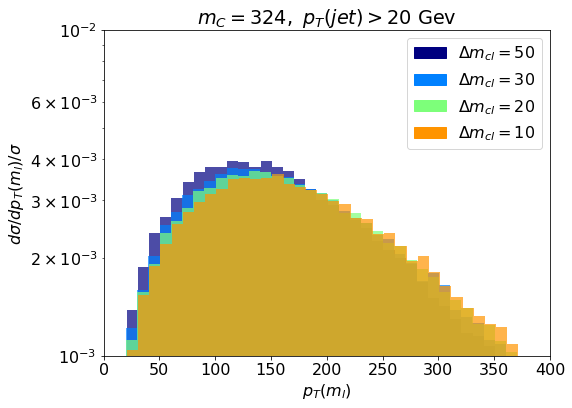

In [21]:
#pT(ml): mC fixed, ml varies

plt.figure(figsize=(8, 6))

histosFromFiles('histos_jet40/pT-ml_mCfixed_mlvaries',10,False)


plt.xlim(0,400)
plt.ylim(10**(-3),10**(-2))
plt.yscale("log")

plt.title("$m_C=324,\ p_T(jet)>20$ Gev")
plt.xlabel('$p_T(m_l)$')
plt.ylabel('$d\\sigma/d p_T(m_l)/\\sigma$')


patch1 = mpatches.Patch(color=usedcolors[0], label='$\\Delta m_{cl}=50$')
#patch2 = mpatches.Patch(color=usedcolors[1], label='$\\Delta m_{cl}=40$')
patch3 = mpatches.Patch(color=usedcolors[1], label='$\\Delta m_{cl}=30$')
patch4 = mpatches.Patch(color=usedcolors[2], label='$\\Delta m_{cl}=20$')
patch5 = mpatches.Patch(color=usedcolors[3], label='$\\Delta m_{cl}=10$')

plt.legend(handles=[patch1,patch3,patch4,patch5],loc='upper right')

plt.savefig('histos_jet40/figs/pt_ml_different_splittings.png')

156
95
41


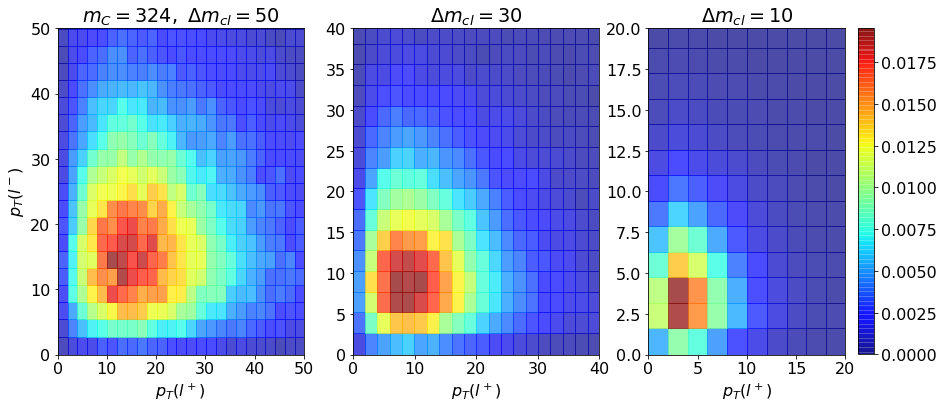

In [10]:
#Correlation of pT for mC fixed, ml varies

plt.figure(figsize=(15, 6))
plt.title('njnljn')

plt.subplot(1, 3, 1)
histos2DFromFiles('histos_jet40/pT2D_mC324_mlvaries/pTlplus_rr5.00e-08_mS2.75e+02_mT3.24e+02.dat',\
                  'histos_jet40/pT2D_mC324_mlvaries/pTlminus_rr5.00e-08_mS2.75e+02_mT3.24e+02.dat',2)
plt.xlim(0,50)
plt.ylim(0,50)

plt.title("$m_C= 324,\ \\Delta m_{cl}=50$")
plt.xlabel('$p_T(l^+)$')
plt.ylabel('$p_T(l^-)$')

plt.subplot(1, 3, 2)
histos2DFromFiles('histos_jet40/pT2D_mC324_mlvaries/pTlplus_rr5.00e-08_mS2.95e+02_mT3.24e+02.dat',\
                  'histos_jet40/pT2D_mC324_mlvaries/pTlminus_rr5.00e-08_mS2.95e+02_mT3.24e+02.dat',2)
plt.xlim(0,40)
plt.ylim(0,40)

plt.title("$\\Delta m_{cl}=30$")
plt.xlabel('$p_T(l^+)$')
#plt.ylabel('$p_T(l^i)$')

plt.subplot(1, 3, 3)
histos2DFromFiles('histos_jet40/pT2D_mC324_mlvaries/pTlplus_rr5.00e-08_mS3.14e+02_mT3.24e+02.dat',\
                  'histos_jet40/pT2D_mC324_mlvaries/pTlminus_rr5.00e-08_mS3.14e+02_mT3.24e+02.dat',2)
plt.xlim(0,20)
plt.ylim(0,20)

plt.title("$\\Delta m_{cl}=10$")
plt.xlabel('$p_T(l^+)$')
#plt.ylabel('$p_T(l^i)$')

plt.colorbar()
plt.savefig('histos_jet40/figs/ptl-corr_different_splittings.png')

histos_jet/pTvisible_mCfixed_mlvaries/pTvisible_rr5.00e-08_mS2.75e+02_mT3.24e+02.dat
123067
histos_jet/pTvisible_mCfixed_mlvaries/pTvisible_rr5.00e-08_mS2.85e+02_mT3.24e+02.dat
123074
histos_jet/pTvisible_mCfixed_mlvaries/pTvisible_rr5.00e-08_mS2.95e+02_mT3.24e+02.dat
123272
histos_jet/pTvisible_mCfixed_mlvaries/pTvisible_rr5.00e-08_mS3.05e+02_mT3.24e+02.dat
123115
histos_jet/pTvisible_mCfixed_mlvaries/pTvisible_rr5.00e-08_mS3.14e+02_mT3.24e+02.dat
123312


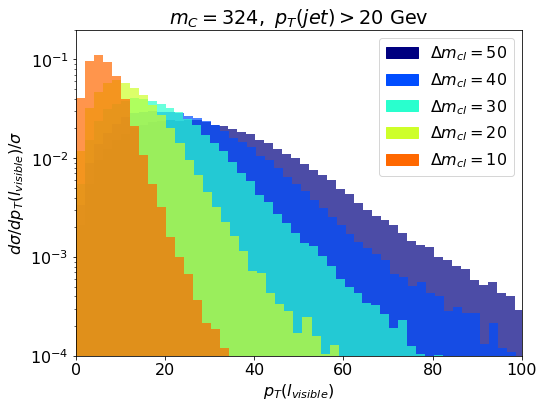

In [14]:
#pTvisible=MET: mC fixed, ml varies

plt.figure(figsize=(8, 6))

histosFromFiles('histos_jet40/pTvisible_mCfixed_mlvaries',2,False)


plt.xlim(0,100)
plt.ylim(10**(-4),2*10**(-1))
plt.yscale("log")

plt.title("$m_C=324,\ p_T(jet)>20$ Gev")
plt.xlabel('$p_T(l_{visible})$')
plt.ylabel('$d\\sigma/d p_T(l_{visible})/\\sigma$')


patch1 = mpatches.Patch(color=usedcolors[0], label='$\\Delta m_{cl}=50$')
patch2 = mpatches.Patch(color=usedcolors[1], label='$\\Delta m_{cl}=40$')
patch3 = mpatches.Patch(color=usedcolors[2], label='$\\Delta m_{cl}=30$')
patch4 = mpatches.Patch(color=usedcolors[3], label='$\\Delta m_{cl}=20$')
patch5 = mpatches.Patch(color=usedcolors[4], label='$\\Delta m_{cl}=10$')

plt.legend(handles=[patch1,patch2,patch3,patch4,patch5],loc='upper right')

plt.savefig('histos_jet40/figs/ptvisible_different_splittings.png')

In [ ]:
#angle between leptons: mC fixed, ml varies

plt.figure(figsize=(8, 6))

histosFromFiles('histos_jet40/langle_mCfixed_mlvaries',0.1,False)


plt.xlim(0,np.pi)
plt.ylim(10**(-2),1)
plt.yscale("log")

plt.title("$m_C=324$")
plt.xlabel('$\\theta(l^+ l^-)$')
plt.ylabel('$d\\sigma/d \\theta(l^+ l^-)/\\sigma$')


patch1 = mpatches.Patch(color=usedcolors[0], label='$\\Delta m_{cl}=50$')
patch2 = mpatches.Patch(color=usedcolors[1], label='$\\Delta m_{cl}=40$')
patch3 = mpatches.Patch(color=usedcolors[2], label='$\\Delta m_{cl}=30$')
patch4 = mpatches.Patch(color=usedcolors[3], label='$\\Delta m_{cl}=20$')
patch5 = mpatches.Patch(color=usedcolors[4], label='$\\Delta m_{cl}=10$')

plt.legend(handles=[patch1,patch2,patch3,patch4,patch5],loc='upper right')

plt.savefig('histos_jet40/figs/langle_different_splittings.png')

In [ ]:
#angle between lepton and MET

plt.figure(figsize=(8, 6))

histosFromFiles('histos_jet40/theta-lMET_mCfixed_mlvaries',0.05,False)


plt.xlim(0,np.pi)
plt.ylim(10**(-2),1.3)
#plt.yscale("log")

plt.title("$m_C=324$")
plt.xlabel('$\\theta(l^+\ MET)$')
plt.ylabel('$d\\sigma/d \\theta(l^+\ MET)/\\sigma$')


patch1 = mpatches.Patch(color=usedcolors[0], label='$\\Delta m_{cl}=50$')
#patch2 = mpatches.Patch(color=usedcolors[1], label='$\\Delta m_{cl}=40$')
patch3 = mpatches.Patch(color=usedcolors[1], label='$\\Delta m_{cl}=30$')
patch4 = mpatches.Patch(color=usedcolors[2], label='$\\Delta m_{cl}=20$')
patch5 = mpatches.Patch(color=usedcolors[3], label='$\\Delta m_{cl}=10$')

plt.legend(handles=[patch1,patch3,patch4,patch5],loc='upper left')

plt.savefig('histos_jet40/figs/angle_lMET_different_splittings.png')

In [ ]:
#m(l+ nu): mC fixed, ml varies

plt.figure(figsize=(8, 6))

histosFromFiles('histos_jet40/m-lnu_mCfixed_mlvaries',2,False)


plt.xlim(0,60)
plt.ylim(10**(-4),2*10**(-1))
plt.yscale("log")

plt.title("$m_C=324$")
plt.xlabel('$m(l^+ \\nu)$')
plt.ylabel('$d\\sigma/d m(l^+ \\nu)/\\sigma$')


patch1 = mpatches.Patch(color=usedcolors[0], label='$\\Delta m_{cl}=50$')
#patch2 = mpatches.Patch(color=usedcolors[1], label='$\\Delta m_{cl}=40$')
patch3 = mpatches.Patch(color=usedcolors[1], label='$\\Delta m_{cl}=30$')
patch4 = mpatches.Patch(color=usedcolors[2], label='$\\Delta m_{cl}=20$')
patch5 = mpatches.Patch(color=usedcolors[3], label='$\\Delta m_{cl}=10$')

plt.legend(handles=[patch1,patch3,patch4,patch5],loc='upper right')

plt.savefig('histos_jet40/figs/m(lnu)_different_splittings.png')

histos_jet/m-ll_mCfixed_mlvaries/m-ll_rr5.00e-08_mS2.75e+02_mT3.24e+02.dat
123067
histos_jet/m-ll_mCfixed_mlvaries/m-ll_rr5.00e-08_mS2.95e+02_mT3.24e+02.dat
123272
histos_jet/m-ll_mCfixed_mlvaries/m-ll_rr5.00e-08_mS3.05e+02_mT3.24e+02.dat
123115
histos_jet/m-ll_mCfixed_mlvaries/m-ll_rr5.00e-08_mS3.14e+02_mT3.24e+02.dat
123312


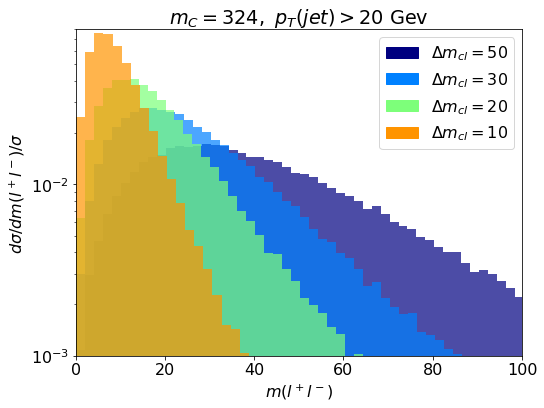

In [13]:
#m(l+ l-): mC fixed, ml varies

plt.figure(figsize=(8, 6))

histosFromFiles('histos_jet40/m-ll_mCfixed_mlvaries',2,False)


plt.xlim(0,100)
plt.ylim(10**(-3),0.08)
plt.yscale("log")

plt.title("$m_C=324,\ p_T(jet)>20$ Gev")
plt.xlabel('$m(l^+ l^-)$')
plt.ylabel('$d\\sigma/d m(l^+ l^-)/\\sigma$')


patch1 = mpatches.Patch(color=usedcolors[0], label='$\\Delta m_{cl}=50$')
#patch2 = mpatches.Patch(color=usedcolors[1], label='$\\Delta m_{cl}=40$')
patch3 = mpatches.Patch(color=usedcolors[1], label='$\\Delta m_{cl}=30$')
patch4 = mpatches.Patch(color=usedcolors[2], label='$\\Delta m_{cl}=20$')
patch5 = mpatches.Patch(color=usedcolors[3], label='$\\Delta m_{cl}=10$')

plt.legend(handles=[patch1,patch3,patch4,patch5],loc='upper right')

plt.savefig('histos_jet40/figs/m(ll)_different_splittings.png')

In [ ]:
#azimuthal angle between lepton and MET: Delta-fixed_mCvaries

plt.figure(figsize=(8, 6))

histosFromFiles('histos_jet40/dphi-lMET_mCfixed_mlvaries',0.05,False)


plt.xlim(0,np.pi)
plt.ylim(10**(-2),1.1)
#plt.yscale("log")

plt.title("$m_C=324$")
plt.xlabel('$d\\phi(l^+\ MET)$')
plt.ylabel('$d\\sigma/d d\\phi(l^+\ MET)/\\sigma$')


patch1 = mpatches.Patch(color=usedcolors[0], label='$\\Delta m_{cl}=50$')
#patch2 = mpatches.Patch(color=usedcolors[1], label='$\\Delta m_{cl}=40$')
patch3 = mpatches.Patch(color=usedcolors[1], label='$\\Delta m_{cl}=30$')
patch4 = mpatches.Patch(color=usedcolors[2], label='$\\Delta m_{cl}=20$')
patch5 = mpatches.Patch(color=usedcolors[3], label='$\\Delta m_{cl}=10$')

plt.legend(handles=[patch1,patch3,patch4,patch5],loc='upper left')

plt.savefig('histos_jet40/figs/azimuthal_angle_lMET_different_splittings.png')

In [ ]:
#Delta(m_Cl) fixed, ml varies

#color scheme
colormap = cm.plasma

In [ ]:
plt.figure(figsize=(8, 6))

intergrateHistos('histos_jet40/pT_Delta-fixed_mCvaries',2,False,0,20,30,40,50)


plt.ylim(10**(-4),1.5*10**(-1))
plt.yscale("log")

plt.title("$\\Delta m_{cl}=20$")
plt.xlabel('$p_T^{cut}(l^+)$')
plt.ylabel('$\\sigma$ [pb]')


patch1 = mpatches.Patch(color=usedcolors[0], label='$m_{C}=120$')
patch2 = mpatches.Patch(color=usedcolors[1], label='$m_{C}=220$')
patch3 = mpatches.Patch(color=usedcolors[2], label='$m_{C}=320$')
patch4 = mpatches.Patch(color=usedcolors[3], label='$m_{C}=420$')
patch5 = mpatches.Patch(color=usedcolors[4], label='$m_{C}=520$')

plt.legend(handles=[patch1,patch2,patch3,patch4,patch5],loc='upper right')

plt.savefig('histos_jet40/figs/cross-section_drop_with_pTcut_Delta_fixed.png')

In [ ]:
#pTl: Delta(m_Cl) fixed, ml varies

plt.figure(figsize=(8, 6))

histosFromFiles('histos_jet40/pT_Delta-fixed_mCvaries',1,False)


plt.xlim(0,60)
plt.ylim(10**(-4),0.1)
plt.yscale("log")

plt.title("$\\Delta m_{cl}=20$")
plt.xlabel('$p_T(l^+)$')
plt.ylabel('$d\\sigma/d p_T(l^+)/\\sigma$')


patch1 = mpatches.Patch(color=usedcolors[0], label='$m_{C}=120$')
patch2 = mpatches.Patch(color=usedcolors[1], label='$m_{C}=220$')
patch3 = mpatches.Patch(color=usedcolors[2], label='$m_{C}=320$')
patch4 = mpatches.Patch(color=usedcolors[3], label='$m_{C}=420$')
patch5 = mpatches.Patch(color=usedcolors[4], label='$m_{C}=520$')

plt.legend(handles=[patch1,patch2,patch3,patch4, patch5],loc='upper right')

plt.savefig('histos_jet40/figs/ptl_different_mC.png')

In [ ]:
#Correlation of pT for mC fixed, ml varies

plt.figure(figsize=(15, 6))
#plt.title('njnljn')
'''
plt.subplot(1, 3, 1)
histos2DFromFiles('histos_jet40/pT2D_Delta20_mCvaries/pTlplus_rr5.00e-08_mS1.00e+02_mT1.20e+02.dat',\
                  'histos_jet40/pT2D_Delta20_mCvaries/pTlminus_rr5.00e-08_mS1.00e+02_mT1.20e+02.dat',2)
plt.xlim(0,30)
plt.ylim(0,30)

plt.title("$m_{C}=120,\ \\Delta m_{cl}=20$")
plt.xlabel('$p_T(l^+)$')
plt.ylabel('$p_T(l^-)$')
'''
plt.subplot(1, 3, 2)
histos2DFromFiles('histos_jet40/pT2D_Delta20_mCvaries/pTlplus_rr5.00e-08_mS3.00e+02_mT3.20e+02.dat',\
                  'histos_jet40/pT2D_Delta20_mCvaries/pTlminus_rr5.00e-08_mS3.00e+02_mT3.20e+02.dat',2)
plt.xlim(0,30)
plt.ylim(0,30)

plt.title("$m_{C}=320$")
plt.xlabel('$p_T(l^+)$')
#plt.ylabel('$p_T(l^i)$')
'''
plt.subplot(1, 3, 3)
histos2DFromFiles('histos_jet40/pT2D_Delta20_mCvaries/pTlplus_rr5.00e-08_mS5.00e+02_mT5.20e+02.dat',\
                  'histos_jet40/pT2D_Delta20_mCvaries/pTlminus_rr5.00e-08_mS5.00e+02_mT5.20e+02.dat',2)
plt.xlim(0,30)
plt.ylim(0,30)

plt.title("$m_{C}=520$")
plt.xlabel('$p_T(l^+)$')
#plt.ylabel('$p_T(l^i)$')
'''

plt.colorbar()
plt.savefig('histos_jet40/figs/ptl-corr_different_mT.png')

In [ ]:
#pT(nu): Delta(m_Cl) fixed, ml varies

plt.figure(figsize=(8, 6))

histosFromFiles('histos_jet40/pTnu_Delta-fixed_mCvaries',1,False)


plt.xlim(0,40)
plt.ylim(10**(-3),0.1)
plt.yscale("log")

plt.title("$\\Delta m_{cl}=20$")
plt.xlabel('$p_T(\\nu)$')
plt.ylabel('$d\\sigma/d p_T(\\nu)/\\sigma$')


patch1 = mpatches.Patch(color=usedcolors[0], label='$m_{C}=120$')
patch2 = mpatches.Patch(color=usedcolors[1], label='$m_{C}=220$')
patch3 = mpatches.Patch(color=usedcolors[2], label='$m_{C}=320$')
patch4 = mpatches.Patch(color=usedcolors[3], label='$m_{C}=420$')
patch5 = mpatches.Patch(color=usedcolors[4], label='$m_{C}=520$')

plt.legend(handles=[patch1,patch2,patch3,patch4, patch5],loc='upper right')
plt.savefig('histos_jet40/figs/pt(nu)_different_mC.png')

In [ ]:
#pT(chi_l): Delta(m_Cl) fixed, ml varies

plt.figure(figsize=(8, 6))

histosFromFiles('histos_jet40/pTchil_Delta-fixed_mCvaries',10,False)


plt.xlim(0,500)
plt.ylim(10**(-3),0.013)
plt.yscale("log")

plt.title("$\\Delta m_{cl}=20$")
plt.xlabel('$p_T(\\chi_l)$')
plt.ylabel('$d\\sigma/d p_T(\\chi_l)/\\sigma$')


patch1 = mpatches.Patch(color=usedcolors[0], label='$m_{C}=120$')
patch2 = mpatches.Patch(color=usedcolors[1], label='$m_{C}=220$')
patch3 = mpatches.Patch(color=usedcolors[2], label='$m_{C}=320$')
patch4 = mpatches.Patch(color=usedcolors[3], label='$m_{C}=420$')
patch5 = mpatches.Patch(color=usedcolors[4], label='$m_{C}=520$')

plt.legend(handles=[patch1,patch2,patch3,patch4, patch5],loc='upper right')

plt.savefig('histos_jet40/figs/pt(chil)_different_mC.png')

In [ ]:
##### pTvisible=MET: Delta(m_Cl) fixed, ml varies

plt.figure(figsize=(8, 6))

histosFromFiles('histos_jet40/pTvisible_Delta-fixed_mCvaries',1,False)


plt.xlim(0,40)
plt.ylim(10**(-4),2*10**(-1))
plt.yscale("log")

plt.title("$\\Delta m_{cl}=20$")
plt.xlabel('$p_T(l_{visible})$')
plt.ylabel('$d\\sigma/d p_T(l_{visible})/\\sigma$')


patch1 = mpatches.Patch(color=usedcolors[0], label='$m_{C}=120$')
patch2 = mpatches.Patch(color=usedcolors[1], label='$m_{C}=220$')
patch3 = mpatches.Patch(color=usedcolors[2], label='$m_{C}=320$')
patch4 = mpatches.Patch(color=usedcolors[3], label='$m_{C}=420$')
patch5 = mpatches.Patch(color=usedcolors[4], label='$m_{C}=520$')

plt.legend(handles=[patch1,patch2,patch3,patch4, patch5],loc='upper right')

plt.savefig('histos_jet40/figs/ptvisible_different_mC.png')

In [ ]:
#angle between leptons: Delta(m_Cl) fixed, ml varies

plt.figure(figsize=(8, 6))

histosFromFiles('histos_jet40/langle_Delta-fixed_mCvaries',0.1,False)


plt.xlim(0,np.pi)
plt.ylim(10**(-2),1)
plt.yscale("log")

plt.title("$\\Delta m_{cl}=20$")
plt.xlabel('$\\theta(l^+ l^-)$')
plt.ylabel('$d\\sigma/d \\theta(l^+ l^-)/\\sigma$')


patch1 = mpatches.Patch(color=usedcolors[0], label='$m_{C}=120$')
patch2 = mpatches.Patch(color=usedcolors[1], label='$m_{C}=220$')
patch3 = mpatches.Patch(color=usedcolors[2], label='$m_{C}=320$')
patch4 = mpatches.Patch(color=usedcolors[3], label='$m_{C}=420$')
patch5 = mpatches.Patch(color=usedcolors[4], label='$m_{C}=520$')

plt.legend(handles=[patch1,patch2,patch3,patch4, patch5],loc='upper right')

plt.savefig('histos_jet40/figs/langle_different_mC.png')

In [ ]:
#angle between lepton and MET: Delta-fixed_mCvaries

plt.figure(figsize=(8, 6))

histosFromFiles('histos_jet40/theta-lMET_Delta-fixed_mCvaries',0.1,False)


plt.xlim(0,np.pi)
plt.ylim(10**(-2),1.8)
#plt.yscale("log")

plt.title("$\\Delta m_{cl}=20$")
plt.xlabel('$\\theta(l^+\ MET)$')
plt.ylabel('$d\\sigma/d \\theta(l^+\ MET)/\\sigma$')


patch1 = mpatches.Patch(color=usedcolors[0], label='$m_{C}=120$')
patch2 = mpatches.Patch(color=usedcolors[1], label='$m_{C}=220$')
patch3 = mpatches.Patch(color=usedcolors[2], label='$m_{C}=320$')
patch4 = mpatches.Patch(color=usedcolors[3], label='$m_{C}=420$')
patch5 = mpatches.Patch(color=usedcolors[4], label='$m_{C}=520$')

plt.legend(handles=[patch1,patch2,patch3,patch4, patch5],loc='upper left')

plt.savefig('histos_jet40/figs/angle_lMET_different_mC.png')

In [ ]:
#azimuthal angle between lepton and MET: Delta-fixed_mCvaries

plt.figure(figsize=(8, 6))

histosFromFiles('histos_jet40/dphi-lMET_Delta-fixed_mCvaries',0.05,False)


plt.xlim(0,np.pi)
plt.ylim(10**(-2),1.3)
#plt.yscale("log")

plt.title("$\\Delta m_{cl}=20$")
plt.xlabel('$d\\phi(l^+\ MET)$')
plt.ylabel('$d\\sigma/d d\\phi(l^+\ MET)/\\sigma$')


patch1 = mpatches.Patch(color=usedcolors[0], label='$m_{C}=120$')
patch2 = mpatches.Patch(color=usedcolors[1], label='$m_{C}=220$')
patch3 = mpatches.Patch(color=usedcolors[2], label='$m_{C}=320$')
patch4 = mpatches.Patch(color=usedcolors[3], label='$m_{C}=420$')
patch5 = mpatches.Patch(color=usedcolors[4], label='$m_{C}=520$')

plt.legend(handles=[patch1,patch2,patch3,patch4, patch5],loc='upper left')

plt.savefig('histos_jet40/figs/azimuthal_angle_lMET_different_mC.png')

In [ ]:
#m(l+ nu): Delta-fixed_mCvaries

plt.figure(figsize=(8, 6))

histosFromFiles('histos_jet40/m-lnu_Delta-fixed_mCvaries',2,False)


plt.xlim(0,25)
plt.ylim(10**(-4),2*10**(-1))
plt.yscale("log")

plt.title("$\\Delta m_{cl}=20$")
plt.xlabel('$m(l^+ \\nu)$')
plt.ylabel('$d\\sigma/d m(l^+ \\nu)/\\sigma$')


patch1 = mpatches.Patch(color=usedcolors[0], label='$m_{C}=120$')
patch2 = mpatches.Patch(color=usedcolors[1], label='$m_{C}=220$')
patch3 = mpatches.Patch(color=usedcolors[2], label='$m_{C}=320$')
patch4 = mpatches.Patch(color=usedcolors[3], label='$m_{C}=420$')
patch5 = mpatches.Patch(color=usedcolors[4], label='$m_{C}=520$')

plt.legend(handles=[patch1,patch2,patch3,patch4, patch5],loc='upper right')

plt.savefig('histos_jet40/figs/m(lnu)_different_mC.png')

In [ ]:
#m(l+ l-): Delta-fixed_mCvaries

plt.figure(figsize=(8, 6))

histosFromFiles('histos_jet40/m-ll_Delta-fixed_mCvaries',2,False)


plt.xlim(0,70)
plt.ylim(10**(-3),0.06)
plt.yscale("log")

plt.title("$\\Delta m_{cl}=20$")
plt.xlabel('$m(l^+ l^-)$')
plt.ylabel('$d\\sigma/d m(l^+ l^-)/\\sigma$')


patch1 = mpatches.Patch(color=usedcolors[0], label='$m_{C}=120$')
patch2 = mpatches.Patch(color=usedcolors[1], label='$m_{C}=220$')
patch3 = mpatches.Patch(color=usedcolors[2], label='$m_{C}=320$')
patch4 = mpatches.Patch(color=usedcolors[3], label='$m_{C}=420$')
patch5 = mpatches.Patch(color=usedcolors[4], label='$m_{C}=520$')

plt.legend(handles=[patch1,patch2,patch3,patch4, patch5],loc='upper right')

plt.savefig('histos_jet40/figs/m(ll)_different_mC.png')

In [ ]:
#Charged states

#color scheme
colormap = cm.viridis

In [ ]:
#pTcharged: mC varies

plt.figure(figsize=(8, 6))

histosFromFiles('histos_jet40/charged_pT_mCvaries',15,True)


plt.xlim(0,700)
plt.ylim(10**(-4),10**(-2))
plt.yscale("log")

plt.xlabel('$p_T(\\chi^+)$')
plt.ylabel('$d\\sigma/d p_T(\\chi^+)/\\sigma$')


patch1 = mpatches.Patch(color=usedcolors[0], label='$m_{C}=520$')
patch2 = mpatches.Patch(color=usedcolors[1], label='$m_{C}=420$')
patch3 = mpatches.Patch(color=usedcolors[2], label='$m_{C}=320$')
patch4 = mpatches.Patch(color=usedcolors[3], label='$m_{C}=220$')
patch5 = mpatches.Patch(color=usedcolors[4], label='$m_{C}=120$')

plt.legend(handles=[patch1,patch2,patch3,patch4, patch5],loc='upper right')

plt.savefig('histos_jet40/figs/ptcharged_different_mC.png')

In [ ]:
#pTcharged: mC varies

plt.figure(figsize=(8, 6))

histosFromFiles('histos_jet40/charged_pT_520',15,True)


plt.xlim(0,700)
plt.ylim(3*10**(-4),2.5*10**(-3))
#plt.yscale("log")

plt.xlabel('$p_T(\\chi^+)$')
plt.ylabel('$d\\sigma/d p_T(\\chi^+)/\\sigma$')


patch1 = mpatches.Patch(color=usedcolors[0], label='$m_{C}=520$')


plt.legend(handles=[patch1],loc='upper right')

plt.savefig('histos_jet40/figs/ptcharged_mC520.png')

In [ ]:
#comparing the ratio # of events for pT=200/(pT=500 or 100) with fig.5 in 1605.06509 (notice that their mass is 470):

print('our(200/500)={}'.format(0.0024/0.00075)) #Our result
print('their(200/500)={}'.format(0.17/0.05)) #Our result

print('our(200/100)={}'.format(0.0024/0.00125)) #Our result
print('their(200/100)={}'.format(0.17/0.14)) #Our result

In [ ]:
#|p| charged: mC varies

plt.figure(figsize=(8, 6))

histosFromFiles('histos_jet40/charged_p_mCvaries',30,True)


plt.xlim(0,2000)
plt.ylim(10**(-4),3*10**(-3))
plt.yscale("log")

plt.xlabel('$|p|(\\chi^+)$')
plt.ylabel('$d\\sigma/d |p|(\\chi^+)/\\sigma$')

patch1 = mpatches.Patch(color=usedcolors[0], label='$m_{C}=520$')
patch2 = mpatches.Patch(color=usedcolors[1], label='$m_{C}=420$')
patch3 = mpatches.Patch(color=usedcolors[2], label='$m_{C}=320$')
patch4 = mpatches.Patch(color=usedcolors[3], label='$m_{C}=220$')
patch5 = mpatches.Patch(color=usedcolors[4], label='$m_{C}=120$')

plt.legend(handles=[patch1,patch2,patch3,patch4, patch5],loc='upper right')

plt.savefig('histos_jet40/figs/p_charged_different_mC.png')


In [ ]:
#eta charged: mC varies

plt.figure(figsize=(8, 6))

histosFromFiles('histos_jet40/charged_eta_mCvaries',0.1,True)

        
plt.xlim(-6,7)
plt.ylim(10**(-3),0.22)
#plt.yscale("log")

plt.xlabel('$\\eta(\\chi^+)$')
plt.ylabel('$d\\sigma/d \\eta(\\chi^+)/\\sigma$')


patch1 = mpatches.Patch(color=usedcolors[0], label='$m_{C}=520$')
patch2 = mpatches.Patch(color=usedcolors[1], label='$m_{C}=420$')
patch3 = mpatches.Patch(color=usedcolors[2], label='$m_{C}=320$')
patch4 = mpatches.Patch(color=usedcolors[3], label='$m_{C}=220$')
patch5 = mpatches.Patch(color=usedcolors[4], label='$m_{C}=120$')

plt.legend(handles=[patch1,patch2,patch3,patch4, patch5],loc='upper right')

plt.savefig('histos_jet40/figs/eta_charged_different_mC.png')

In [ ]:
#eta charged: mC varies

plt.figure(figsize=(8, 6))

histosFromFiles('histos_jet40/charged_y_mCvaries',0.1,True)


plt.xlim(-4,5)
plt.ylim(10**(-3),0.4)
#plt.yscale("log")

plt.xlabel('$y(\\chi^+)$')
plt.ylabel('$d\\sigma/d y(\\chi^+)/\\sigma$')


patch1 = mpatches.Patch(color=usedcolors[0], label='$m_{C}=520$')
patch2 = mpatches.Patch(color=usedcolors[1], label='$m_{C}=420$')
patch3 = mpatches.Patch(color=usedcolors[2], label='$m_{C}=320$')
patch4 = mpatches.Patch(color=usedcolors[3], label='$m_{C}=220$')
patch5 = mpatches.Patch(color=usedcolors[4], label='$m_{C}=120$')

plt.legend(handles=[patch1,patch2,patch3,patch4, patch5],loc='upper right')

plt.savefig('histos_jet40/figs/y_charged_different_mC.png')

In [ ]:
#eta charged: mC varies

plt.figure(figsize=(8, 6))

histosFromFiles('histos_jet40/charged_Dy_mCvaries',0.1,True)


plt.xlim(-3,4)
plt.ylim(10**(-3),0.5)
#plt.yscale("log")

plt.xlabel('$\\Delta y(\\chi^+)$')
plt.ylabel('$d\\sigma/d \\Delta y(\\chi^+)/\\sigma$')


patch1 = mpatches.Patch(color=usedcolors[0], label='$m_{C}=520$')
patch2 = mpatches.Patch(color=usedcolors[1], label='$m_{C}=420$')
patch3 = mpatches.Patch(color=usedcolors[2], label='$m_{C}=320$')
patch4 = mpatches.Patch(color=usedcolors[3], label='$m_{C}=220$')
patch5 = mpatches.Patch(color=usedcolors[4], label='$m_{C}=120$')

plt.legend(handles=[patch1,patch2,patch3,patch4, patch5],loc='upper right')

plt.savefig('histos_jet40/figs/Dy_charged_different_mC.png')

In [ ]:
#angle between charged states:

plt.figure(figsize=(8, 6))

histosFromFiles('histos_jet40/charged_thetaPM_mCvaries',0.1,True)


plt.xlim(0,np.pi)
plt.ylim(10**(-2),1.1)
plt.yscale("log")

plt.title("$\\Delta m_{cl}=20$")
plt.xlabel('$\\theta(l^+ l^-)$')
plt.ylabel('$d\\sigma/d \\theta(l\\chi^+ \\chi^-)/\\sigma$')


patch1 = mpatches.Patch(color=usedcolors[0], label='$m_{C}=520$')
patch2 = mpatches.Patch(color=usedcolors[1], label='$m_{C}=420$')
patch3 = mpatches.Patch(color=usedcolors[2], label='$m_{C}=320$')
patch4 = mpatches.Patch(color=usedcolors[3], label='$m_{C}=220$')
patch5 = mpatches.Patch(color=usedcolors[4], label='$m_{C}=120$')

plt.legend(handles=[patch1,patch2,patch3,patch4, patch5],loc='upper right')

plt.savefig('histos_jet40/figs/theta_charged_different_mC.png')